Cargamos las librerías e importamos nuestros datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('/Users/mariosanchez/Desktop/Proyecto_Manjar/Base de datos de Manjar.xlsx')
df.head()

,agno,mes,upc,descri_item,Vta_Uni,Vta_Pesos,Vta_Kg,EMPRESA,categoria,fabricante,marca,Gramaje,Empaque,SEGMENTO,VARIEDAD,CADENA,ZONAS
0,2018,8,78040519,SOPROLE MANJAR ACARAMELADO PT PL 200 SOPROLE,180.0,134835.0,36.00,RETAILER B,DULCE DE LECHE,SOPROLE,SOPROLE,200,POTE,MANJAR,REGULAR,CADENA B,Z10 CONCEPCION
1,2021,1,7804000001332,ECKART DULCE DE LECHE SIN LACTOSA POTE PL 380 ...,192.0,472371.0,72.96,RETAILER C,DULCE DE LECHE,ECKART ALIMENTOS SPA,ECKART,380,POTE,DULCE DE LECHE,SIN LACTOSA,CADENA C1,Z11 ZONA SUR
2,2018,6,78003095,NESTLE EL MANJAR.POT. 400 NESTLE,1455.0,1486872.0,582.00,RETAILER A,DULCE DE LECHE,NESTLE,NESTLE,400,POTE,MANJAR,REGULAR,CADENA A1,Z2 ANTOFAGASTA
3,2017,4,7802950004892,NESTLE EL MANJAR BOLSA 1000 NESTLE,5300.0,13270009.0,5300.00,RETAILER B,DULCE DE LECHE,NESTLE,NESTLE,1000,BOLSA,MANJAR,REGULAR,CADENA B,RM5 SANTIAGO SUR ORIENTE
4,2018,11,78040519,SOPROLE MANJAR ACARAMELADO PT PL 200 SOPROLE,308.0,218256.0,61.60,RETAILER B,DULCE DE LECHE,SOPROLE,SOPROLE,200,POTE,MANJAR,REGULAR,CADENA B,Z1 NORTE GRANDE


Ahora veremos específicamente como se corportaron las ventas para el fabricante que queremos analizar: Watts

In [8]:
df['agno'].value_counts()

2018    35655
2017    35500
2020    34839
2019    33992
2021    30166
Name: agno, dtype: int64

In [14]:
df.groupby('fabricante')['Vta_Pesos'].sum().sort_values(ascending=False)

fabricante
NESTLE                                 6.870889e+10
COLUN                                  4.862366e+10
SOPROLE                                1.397565e+10
WATT S                                 9.805561e+09
PRIVADO                                7.991425e+09
ECKART ALIMENTOS SPA                   7.449064e+09
A.CORDILLERA                           2.139116e+09
OT.CIAS.                               1.274861e+09
MASIVOS S.A.                           1.048728e+09
IANSAGRO                               8.002817e+08
COM. DE INSUMOS Y PROD. ALIMENTICIO    2.636960e+08
INV.NULAN                              9.935974e+07
MICKELSEN AGROINDUSTRIAS E.I.R.L       2.883149e+07
DULCINEA S.A.                          2.763793e+07
LAPATAIA                               9.570619e+06
AGR.CODIGUA                            2.957959e+06
JOSE MANUEL LANGER GIORDANO            5.467180e+05
QUILLAYES SURLAT                       7.790000e+02
Name: Vta_Pesos, dtype: float64

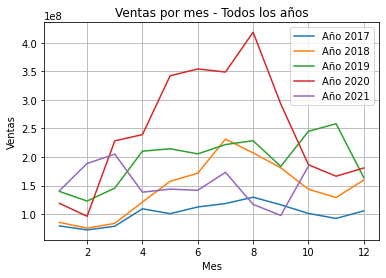

In [15]:
plt.figure()  

for agno_sel in range(2017, 2022):  
    data_agno_sel = df[(df['agno'] == agno_sel) & (df['fabricante'] == 'WATT S')]
    ventas_por_mes = data_agno_sel.groupby('mes')['Vta_Pesos'].sum()
    plt.plot(ventas_por_mes.index, ventas_por_mes.values, label=f'Año {agno_sel}')

plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Ventas por mes - Todos los años')
plt.legend() 
plt.grid(True)  

plt.show()  

Podemos apreciar que el mejor año para Watts fue el año 2020, siguiendo la tendencia del mercado expuesta anteriormente. Los demás años si bien varían se mantienen con un ligero aumento entre abril y agosto. El año 2021 no se encuentra completo, solo hasta el mes de octubre (10).

Ahora veremos si tenemos alguna oportunidad para el fabricante en sus Variedades, por lo cual el primer paso es ver las variedades que presenta el mercado vs las variedades que posee el fabricante.

In [41]:
print('Variedades del Mercado: ')
print(df['VARIEDAD'].unique())
print('Variedades de Watts')
print(df[df['fabricante'] == 'WATT S']['VARIEDAD'].unique())

Variedades del Mercado: 
['REGULAR' 'SIN LACTOSA' 'ARTESANAL' 'LIGHT' 'VEGETAL' 'SABOR' 'FUNCIONAL']
Variedades de Watts
['REGULAR' 'FUNCIONAL']


Vemos que Watts solo posee 2 variedades, las cuales veremos a continuación su comportamiento a lo largo de los años.

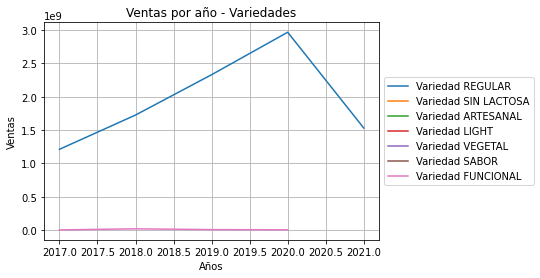

In [67]:
plt.figure()  

for variedad in df['VARIEDAD'].unique():  
    data_agno_sel = df[(df['VARIEDAD'] == variedad) & (df['fabricante'] == 'WATT S')]
    ventas_por_mes = data_agno_sel.groupby('agno')['Vta_Pesos'].sum()
    plt.plot(ventas_por_mes.index, ventas_por_mes.values, label=f'Variedad {variedad}')

plt.xlabel('Años')
plt.ylabel('Ventas')
plt.title('Ventas por año - Variedades')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid(True)  

plt.show()  

Vemos que el fabricante vende principalmente la variedad Regular, la cual ha venido cayendo en venta en el último periodo. Ahora veremos como le esta llendo a las demás variedades en el mercado.

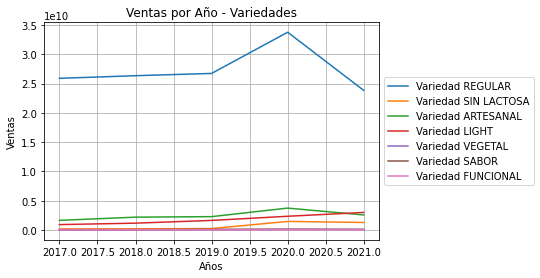

In [68]:
plt.figure()  

for variedad in df['VARIEDAD'].unique():
    data_agno_sel = df[(df['VARIEDAD'] == variedad)]
    ventas_por_mes = data_agno_sel.groupby('agno')['Vta_Pesos'].sum()
    plt.plot(ventas_por_mes.index, ventas_por_mes.values, label=f'Variedad {variedad}')

plt.xlabel('Años')
plt.ylabel('Ventas')
plt.title('Ventas por Año - Variedades')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid(True)  

plt.show()  

Vemos que también la variedad más vendida en el mercado es Regular. Por lo cual, ahora sacaremos esta variedad del gráfico para analizar las demás en mayor detalle.

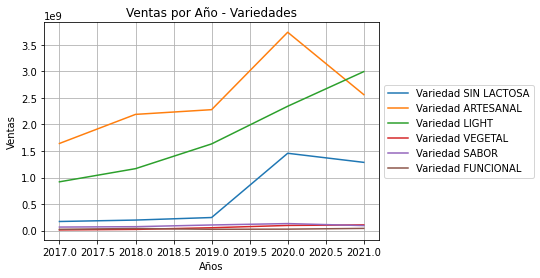

In [70]:
plt.figure()  

for variedad in df['VARIEDAD'].unique():
    if variedad != 'REGULAR':  
        data_agno_sel = df[(df['VARIEDAD'] == variedad)]
        ventas_por_mes = data_agno_sel.groupby('agno')['Vta_Pesos'].sum()
        plt.plot(ventas_por_mes.index, ventas_por_mes.values, label=f'Variedad {variedad}')

plt.xlabel('Años')
plt.ylabel('Ventas')
plt.title('Ventas por Año - Variedades')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid(True)  

plt.show()  

Aquí nos podemos dar cuenta que la variedad Light y Sin Lactosa han venido en aumento en el último periodo, por lo cual encontramos una gran oportunidad de innovar en estas variedades donde la preocupación por los alimentos saludables ha venido cobrando mayor importancia.

Ahora veremos lo mismo pero para el empaque

In [45]:
print('Empaques del Mercado: ')
print(df['Empaque'].unique())
print('Empaques de Watts')
print(df[df['fabricante'] == 'WATT S']['Empaque'].unique())

Empaques del Mercado: 
['POTE' 'BOLSA' 'FRASCO VIDRIO' 'TARRO' 'DOY PACK' 'CAJA']
Empaques de Watts
['BOLSA' 'DOY PACK']


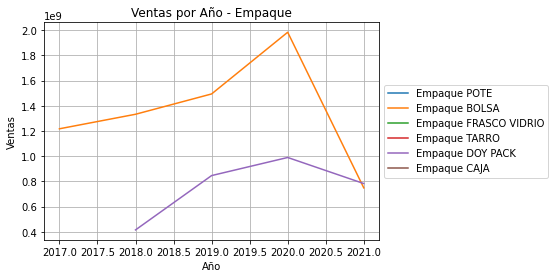

In [71]:
plt.figure()  

for Empaque in df['Empaque'].unique():  
    data_agno_sel = df[(df['Empaque'] == Empaque) & (df['fabricante'] == 'WATT S')]
    ventas_por_mes = data_agno_sel.groupby('agno')['Vta_Pesos'].sum()
    plt.plot(ventas_por_mes.index, ventas_por_mes.values, label=f'Empaque {Empaque}')

plt.xlabel('Año')
plt.ylabel('Ventas')
plt.title('Ventas por Año - Empaque')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid(True)  

plt.show()  

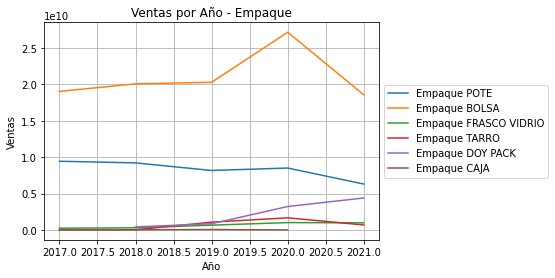

In [72]:
plt.figure()  

for Empaque in df['Empaque'].unique():
    data_agno_sel = df[(df['Empaque'] == Empaque)]
    ventas_por_mes = data_agno_sel.groupby('agno')['Vta_Pesos'].sum()
    plt.plot(ventas_por_mes.index, ventas_por_mes.values, label=f'Empaque {Empaque}')

plt.xlabel('Año')
plt.ylabel('Ventas')
plt.title('Ventas por Año - Empaque')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid(True)  

plt.show()  

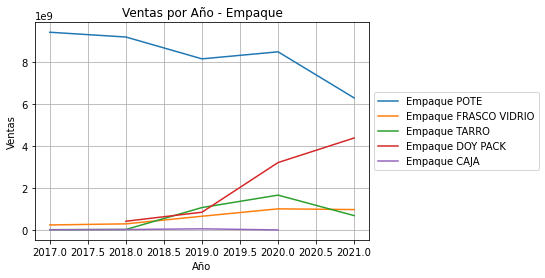

In [73]:
plt.figure()  

for Empaque in df['Empaque'].unique():
    if Empaque != 'BOLSA':  
        data_agno_sel = df[(df['Empaque'] == Empaque)]
        ventas_por_mes = data_agno_sel.groupby('agno')['Vta_Pesos'].sum()
        plt.plot(ventas_por_mes.index, ventas_por_mes.values, label=f'Empaque {Empaque}')

plt.xlabel('Año')
plt.ylabel('Ventas')
plt.title('Ventas por Año - Empaque')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid(True)  

plt.show()  

El fabricante Watts posee solo dos empaques, Bolsa y Doypack. Sin embargo a pesar de que bolsa es el empaque mas vendido, el segundo más vendido (a pesar que viene cayendo en sus ventas) es el empaque en Pote, el cual no está considerando el fabricante evaluado.

Por último haremos un análisis similar para los tipos de gramaje

In [51]:
print('Gramaje del Mercado: ')
print(df['Gramaje'].unique())
print('Gramaje de Watts')
print(df[df['fabricante'] == 'WATT S']['Gramaje'].unique())

Gramaje del Mercado: 
[ 200  380  400 1000  340  500  900  800  550  350  545  250 5000  460
  450  190  420  300 6000 9600  780  440  320 1100  425  880]
Gramaje de Watts
[ 500  800 1000  400 6000]


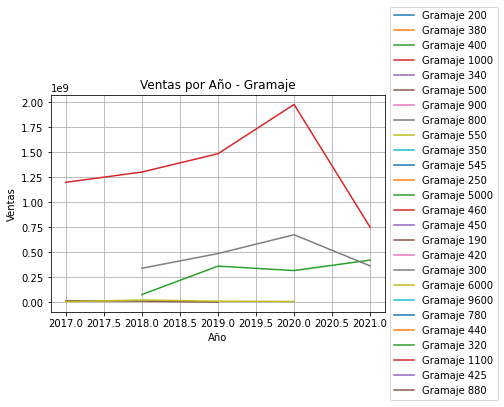

In [74]:
plt.figure()  

for Gramaje in df['Gramaje'].unique():  
    data_agno_sel = df[(df['Gramaje'] == Gramaje) & (df['fabricante'] == 'WATT S')]
    ventas_por_mes = data_agno_sel.groupby('agno')['Vta_Pesos'].sum()
    plt.plot(ventas_por_mes.index, ventas_por_mes.values, label=f'Gramaje {Gramaje}')

plt.xlabel('Año')
plt.ylabel('Ventas')
plt.title('Ventas por Año - Gramaje')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid(True)  

plt.show() 

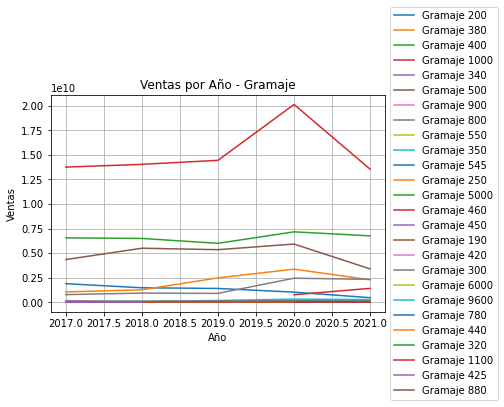

In [75]:
plt.figure()  

for Gramaje in df['Gramaje'].unique():
    data_agno_sel = df[(df['Gramaje'] == Gramaje)]
    ventas_por_mes = data_agno_sel.groupby('agno')['Vta_Pesos'].sum()
    plt.plot(ventas_por_mes.index, ventas_por_mes.values, label=f'Gramaje {Gramaje}')

plt.xlabel('Año')
plt.ylabel('Ventas')
plt.title('Ventas por Año - Gramaje')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid(True)  

plt.show()  

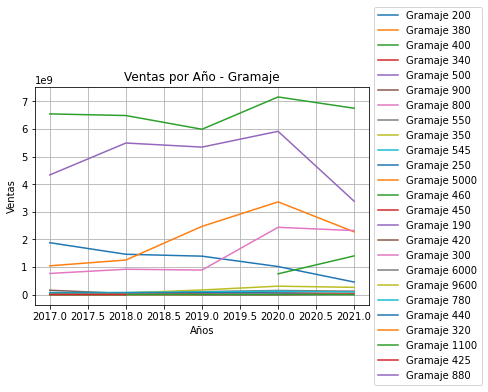

In [76]:
plt.figure()  

for Gramaje in df['Gramaje'].unique():
    if Gramaje != 1000:  
        data_agno_sel = df[(df['Gramaje'] == Gramaje)]
        ventas_por_mes = data_agno_sel.groupby('agno')['Vta_Pesos'].sum()
        plt.plot(ventas_por_mes.index, ventas_por_mes.values, label=f'Gramaje {Gramaje}')

plt.xlabel('Años')
plt.ylabel('Ventas')
plt.title('Ventas por Año - Gramaje')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid(True)  

plt.show() 

Watts posee principalemte 3 tipos de gramajes, 1000, 400 y 800 gramos. Sin embargo en el mercado los más vendidos son 1000, 400, 500 y 380 gramos. Por lo cual nuevamente hay una oportunidad de innovar en nuevos gramajes no utilizados por el fabricante.